In [ ]:
#load data
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_excel('Taxi_Trip_Data.xlsx')


In [ ]:
df_yedek = df

In [ ]:
#drop variables that are not going to be feautures
df = df.drop(['store_and_fwd_flag', 'PULocationID','DOLocationID'], axis=1)
df = df.drop(['fare_amount', 'extra','mta_tax','tip_amount','tolls_amount','DOBorough'], axis=1)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PUBorough,passenger_count,trip_distance,improvement_surcharge,total_amount
0,1,2021-07-01 00:30:52,2021-07-01 00:35:36,1,Manhattan,1,1.20,0.3,7.30
1,2,2021-07-01 00:25:36,2021-07-01 01:01:31,1,Manhattan,2,13.69,0.3,43.30
2,2,2021-07-01 00:05:58,2021-07-01 00:12:00,1,Brooklyn,1,0.95,0.3,10.14
3,2,2021-07-01 00:41:40,2021-07-01 00:47:23,1,Manhattan,1,1.24,0.3,7.80
4,2,2021-07-01 00:51:32,2021-07-01 00:58:46,1,Manhattan,1,1.10,0.3,8.30
...,...,...,...,...,...,...,...,...,...
51168,2,2021-07-31 22:58:03,2021-07-31 23:16:59,1,Manhattan,1,1.00,0.3,8.16
51169,2,2021-07-31 23:24:30,2021-07-31 23:36:26,1,Manhattan,1,2.28,0.3,14.75
51170,2,2021-07-31 23:42:19,2021-07-31 23:43:40,1,Manhattan,1,0.21,0.3,4.30
51171,2,2021-07-31 23:02:05,2021-07-31 23:20:49,1,Queens,1,4.09,0.3,21.62


In [ ]:
#take time difference in hours
df['Difference'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime'])
df['Difference'] = df['Difference'].dt.seconds
df['Difference'] =df['Difference']/60
#normalize data
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df[['passenger_count', 'trip_distance','improvement_surcharge','Difference','total_amount']] = min_max_scaler.fit_transform(df[['passenger_count', 'trip_distance','improvement_surcharge','Difference','total_amount']])
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PUBorough,passenger_count,trip_distance,improvement_surcharge,total_amount,Difference
0,1,2021-07-01 00:30:52,2021-07-01 00:35:36,1,Manhattan,0.03125,0.010922,1.0,0.249917,0.003290
1,2,2021-07-01 00:25:36,2021-07-01 01:01:31,1,Manhattan,0.06250,0.124602,1.0,0.307004,0.024964
2,2,2021-07-01 00:05:58,2021-07-01 00:12:00,1,Brooklyn,0.03125,0.008647,1.0,0.254420,0.004193
3,2,2021-07-01 00:41:40,2021-07-01 00:47:23,1,Manhattan,0.03125,0.011286,1.0,0.250710,0.003973
4,2,2021-07-01 00:51:32,2021-07-01 00:58:46,1,Manhattan,0.03125,0.010012,1.0,0.251503,0.005027
...,...,...,...,...,...,...,...,...,...,...
51168,2,2021-07-31 22:58:03,2021-07-31 23:16:59,1,Manhattan,0.03125,0.009102,1.0,0.251281,0.013159
51169,2,2021-07-31 23:24:30,2021-07-31 23:36:26,1,Manhattan,0.03125,0.020752,1.0,0.261731,0.008294
51170,2,2021-07-31 23:42:19,2021-07-31 23:43:40,1,Manhattan,0.03125,0.001911,1.0,0.245159,0.000938
51171,2,2021-07-31 23:02:05,2021-07-31 23:20:49,1,Queens,0.03125,0.037226,1.0,0.272625,0.013020


In [ ]:
#one hot encode the pick up county since it is categorical
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
print(df['PUBorough'].unique())
new_df = pd.DataFrame(encoder.fit_transform(df[['PUBorough']]).toarray())
new_df.columns = ['bronx', 'brooklyn', 'manhattan', 'queens', 'staten island','unknown']
final_df=pd.concat([df, new_df],axis=1)
final_df

['Manhattan' 'Brooklyn' 'Queens' 'Bronx' 'Staten Island' 'Unknown']


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PUBorough,passenger_count,trip_distance,improvement_surcharge,total_amount,Difference,bronx,brooklyn,manhattan,queens,staten island,unknown
0,1,2021-07-01 00:30:52,2021-07-01 00:35:36,1,Manhattan,0.03125,0.010922,1.0,0.249917,0.003290,0.0,0.0,1.0,0.0,0.0,0.0
1,2,2021-07-01 00:25:36,2021-07-01 01:01:31,1,Manhattan,0.06250,0.124602,1.0,0.307004,0.024964,0.0,0.0,1.0,0.0,0.0,0.0
2,2,2021-07-01 00:05:58,2021-07-01 00:12:00,1,Brooklyn,0.03125,0.008647,1.0,0.254420,0.004193,0.0,1.0,0.0,0.0,0.0,0.0
3,2,2021-07-01 00:41:40,2021-07-01 00:47:23,1,Manhattan,0.03125,0.011286,1.0,0.250710,0.003973,0.0,0.0,1.0,0.0,0.0,0.0
4,2,2021-07-01 00:51:32,2021-07-01 00:58:46,1,Manhattan,0.03125,0.010012,1.0,0.251503,0.005027,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51168,2,2021-07-31 22:58:03,2021-07-31 23:16:59,1,Manhattan,0.03125,0.009102,1.0,0.251281,0.013159,0.0,0.0,1.0,0.0,0.0,0.0
51169,2,2021-07-31 23:24:30,2021-07-31 23:36:26,1,Manhattan,0.03125,0.020752,1.0,0.261731,0.008294,0.0,0.0,1.0,0.0,0.0,0.0
51170,2,2021-07-31 23:42:19,2021-07-31 23:43:40,1,Manhattan,0.03125,0.001911,1.0,0.245159,0.000938,0.0,0.0,1.0,0.0,0.0,0.0
51171,2,2021-07-31 23:02:05,2021-07-31 23:20:49,1,Queens,0.03125,0.037226,1.0,0.272625,0.013020,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# trip_distance and difference will be feautures in second stage model so we drop them too
from sklearn.model_selection import train_test_split
X = final_df
y = final_df["total_amount"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# dropping unused variables from train and test sets respectively
X_train_1= X_train[['trip_distance' , 'Difference','total_amount']]
X_train= X_train.drop('lpep_pickup_datetime',axis=1)
X_train= X_train.drop('lpep_dropoff_datetime',axis=1)
X_train= X_train.drop('RatecodeID',axis=1)
X_train= X_train.drop('PUBorough',axis=1)
X_train= X_train.drop('trip_distance',axis=1)
X_train= X_train.drop('Difference',axis=1)
X_train= X_train.drop('VendorID',axis=1)
X_train= X_train.drop('total_amount',axis=1)

X_train

,passenger_count,improvement_surcharge,bronx,brooklyn,manhattan,queens,staten island,unknown
18633,0.03125,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8329,0.03125,1.0,0.0,0.0,0.0,1.0,0.0,0.0
28906,0.03125,1.0,0.0,1.0,0.0,0.0,0.0,0.0
38179,0.03125,1.0,0.0,0.0,1.0,0.0,0.0,0.0
31399,0.03125,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
50057,0.03125,1.0,0.0,0.0,1.0,0.0,0.0,0.0
32511,0.03125,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5192,0.03125,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12172,0.03125,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:

X_test_1=X_test[['trip_distance' , 'Difference','total_amount']]
X_test= X_test.drop('lpep_pickup_datetime',axis=1)
X_test= X_test.drop('lpep_dropoff_datetime',axis=1)
X_test= X_test.drop('RatecodeID',axis=1)
X_test= X_test.drop('PUBorough',axis=1)
X_test= X_test.drop('trip_distance',axis=1)
X_test= X_test.drop('Difference',axis=1)
X_test= X_test.drop('VendorID',axis=1)
X_test= X_test.drop('total_amount',axis=1)

X_test

,passenger_count,improvement_surcharge,bronx,brooklyn,manhattan,queens,staten island,unknown
45755,0.03125,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25656,0.03125,1.0,0.0,0.0,1.0,0.0,0.0,0.0
49094,0.18750,1.0,0.0,1.0,0.0,0.0,0.0,0.0
35609,0.03125,1.0,0.0,1.0,0.0,0.0,0.0,0.0
25801,0.03125,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
14717,0.03125,1.0,0.0,0.0,1.0,0.0,0.0,0.0
42669,0.03125,1.0,0.0,0.0,1.0,0.0,0.0,0.0
45572,0.03125,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2311,0.03125,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#this df is saved for 2nd stage modeling. The output of the 1st input will be added
#to this df as another column
X_test_1

,trip_distance,Difference,total_amount
45755,0.000728,0.001216,0.231522
25656,0.011559,0.005410,0.253183
49094,0.006553,0.004332,0.250710
35609,0.143715,0.038691,0.320483
25801,0.010467,0.004124,0.249917
...,...,...,...
14717,0.007281,0.003290,0.250329
42669,0.002639,0.001471,0.245159
45572,0.014563,0.006974,0.257925
2311,0.023937,0.006985,0.259828


In [ ]:
X_train_1

,trip_distance,Difference,total_amount
18633,0.007736,0.003267,0.248331
8329,0.000000,0.001471,0.245159
28906,0.009648,0.003452,0.251328
38179,0.055338,0.009823,0.276478
31399,0.010558,0.005155,0.251503
...,...,...,...
50057,0.016474,0.007541,0.258765
32511,0.013926,0.004749,0.256656
5192,0.008738,0.002004,0.248331
12172,0.000000,0.000058,0.257941


In [ ]:
y_test

45755    0.231522
25656    0.253183
49094    0.250710
35609    0.320483
25801    0.249917
           ...   
14717    0.250329
42669    0.245159
45572    0.257925
2311     0.259828
23383    0.273640
Name: total_amount, Length: 15352, dtype: float64

In [ ]:
y_train

18633    0.248331
8329     0.245159
28906    0.251328
38179    0.276478
31399    0.251503
           ...   
50057    0.258765
32511    0.256656
5192     0.248331
12172    0.257941
33003    0.251629
Name: total_amount, Length: 35821, dtype: float64

In [ ]:
#1st stage model: regression neural network
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
model = MLPRegressor()
model.fit(X_train, y_train)
print(model)

expected_y  = y_test
predicted_y = model.predict(X_test)
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

MLPRegressor()
0.08637550557153673
0.0003799704389012316


In [ ]:
#1st stage model: regression decision tree

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
expected_y  = y_test
print(metrics.r2_score(expected_y, y_pred))
print(metrics.mean_squared_log_error(expected_y, y_pred))

0.0790746141740426
0.0003833191140070122


In [ ]:
#1st stage model: regression multivariant linear
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)
y_prediction =  LR.predict(X_test)
print(y_prediction)
expected_y  = y_test
print(metrics.r2_score(expected_y, y_prediction))
print(metrics.mean_squared_log_error(expected_y, y_prediction))

[0.21332932 0.26282883 0.27309036 ... 0.26282883 0.26282883 0.26282883]
0.09859783076380402
0.0003746145648729263


In [ ]:
#2nd stage model:MLP regressor:
#1st stage model:MLP regressor:

MLP_df = pd.DataFrame(predicted_y, columns = ['1st_output_MLP'])
MLP_df
#final_df1=pd.concat([MLP_df, X_test],axis=1)
X_test_MLP = X_test_1
X_test_MLP['1st_output'] = MLP_df['1st_output_MLP']
X_test_MLP = X_test_MLP[X_test_MLP['1st_output'].notna()]
X_test_MLP


,trip_distance,Difference,total_amount,1st_output
10594,0.006644,0.003313,0.249378,0.280185
14178,0.039137,0.020562,0.277985,0.271614
14490,0.084737,0.024848,0.290354,0.271614
6826,0.041595,0.011584,0.273164,0.260021
7905,0.014290,0.006904,0.253215,0.271614
...,...,...,...,...
2591,0.005552,0.004865,0.249124,0.271614
6628,0.019113,0.005757,0.263158,0.271614
12348,0.012014,0.006696,0.252295,0.260021
14717,0.007281,0.003290,0.250329,0.271614


MLPRegressor()
0.799085815041161
9.042047229274676e-05
0.7990955978364657
0.0064826855756815755


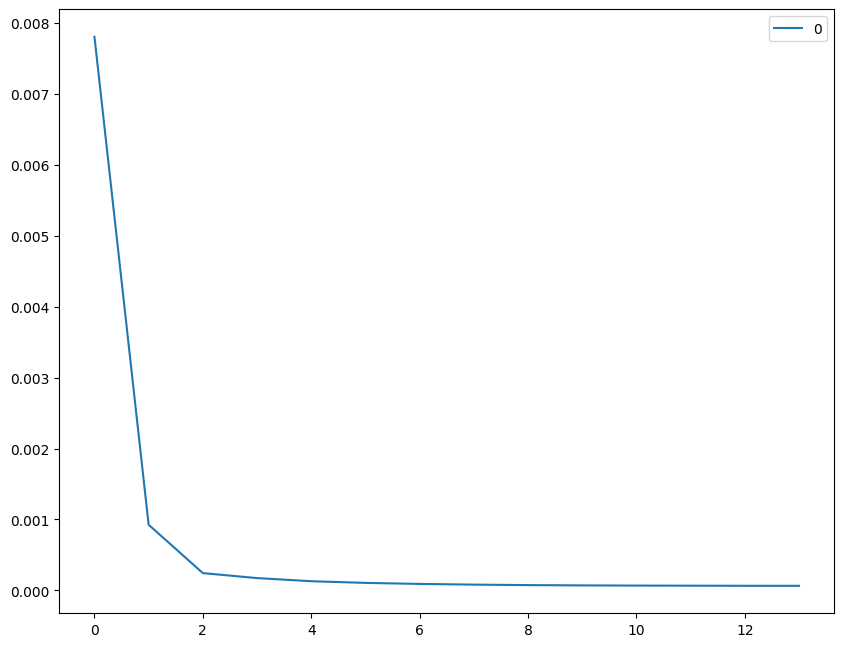

In [ ]:
#2nd stage model MLP Regressor
X = X_test_MLP
X = X.drop('total_amount',axis=1)

y = X_test_MLP["total_amount"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
model.fit(X_train, y_train)
print(model)
expected_y  = y_test
predicted_y = model.predict(X_test)
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))
print(metrics.explained_variance_score(expected_y, predicted_y))
print(mean_absolute_error(expected_y, predicted_y))
pd.DataFrame(model.loss_curve_).plot()


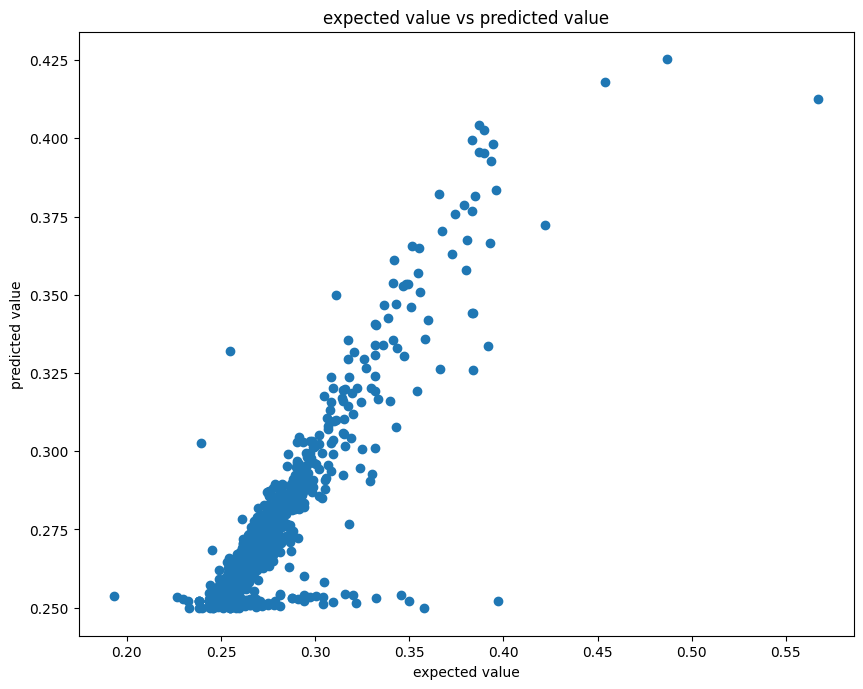

In [ ]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(expected_y, predicted_y)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('expected value vs predicted value')
plt.xlabel('expected value')
plt.ylabel('predicted value')
plt.show()

In [ ]:
X

,trip_distance,Difference,1st_output
10594,0.006644,0.003313,0.280185
14178,0.039137,0.020562,0.271614
14490,0.084737,0.024848,0.271614
6826,0.041595,0.011584,0.260021
7905,0.014290,0.006904,0.271614
...,...,...,...
2591,0.005552,0.004865,0.271614
6628,0.019113,0.005757,0.271614
12348,0.012014,0.006696,0.260021
14717,0.007281,0.003290,0.271614


MLPRegressor()
0.7412935764653636
0.0001145044866622395
0.7412989406725736
0.007946733071775


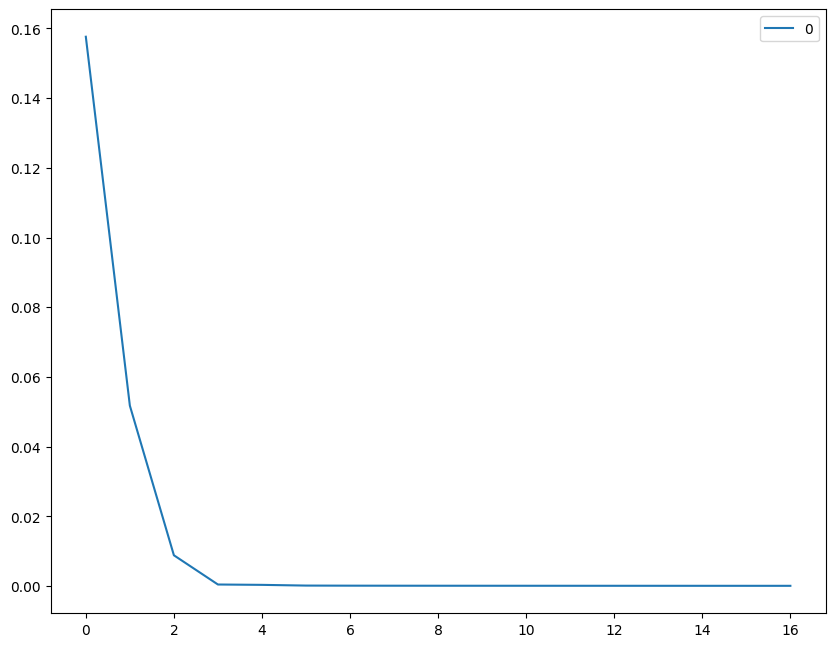

In [ ]:
#2nd stage model:MLP regressor:
#1st stage model:Decision tree regressor:

#X_test_tree is the dataset we are going to use for this modelling
tree_df = pd.DataFrame(y_pred, columns = ['1st_output_tree'])
X_test_tree = X_test_1
X_test_tree['1st_output'] = tree_df['1st_output_tree']
X_test_tree = X_test_tree[X_test_tree['1st_output'].notna()]
X_test_tree

X = X_test_tree
X = X.drop('total_amount',axis=1)

y = X_test_tree["total_amount"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
model.fit(X_train, y_train)
print(model)
expected_y  = y_test
predicted_y = model.predict(X_test)
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))
print(metrics.explained_variance_score(expected_y, predicted_y))
print(mean_absolute_error(expected_y, predicted_y))
pd.DataFrame(model.loss_curve_).plot()


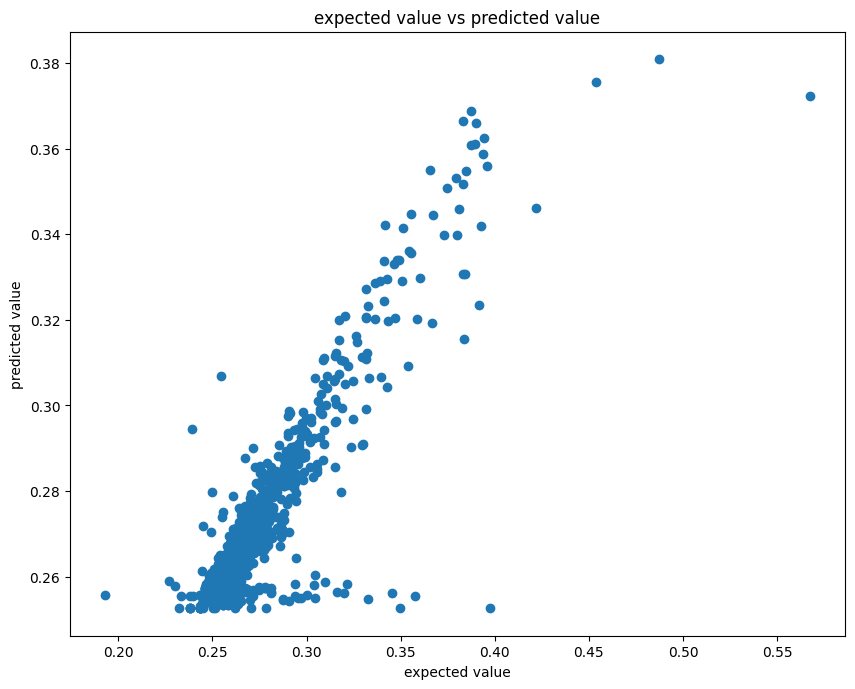

In [ ]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(expected_y, predicted_y)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('expected value vs predicted value')
plt.xlabel('expected value')
plt.ylabel('predicted value')
plt.show()

MLPRegressor()
0.8054674286139627
8.672532539111125e-05
0.8054839674148222
0.006242224843842426


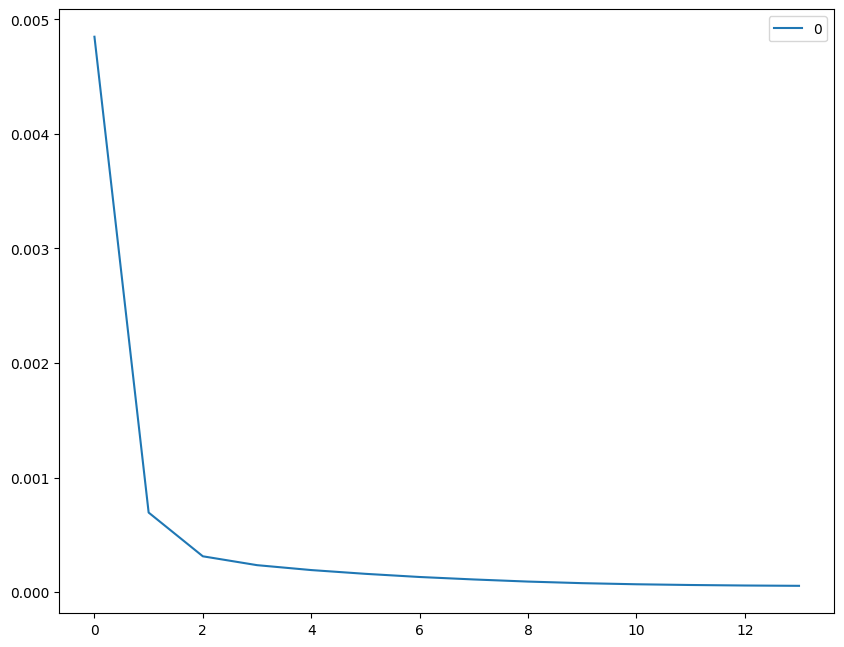

In [ ]:
#3rd stage model:Multivariate Linear regressor:
#1st stage model:Decision tree regressor:

#X_test_tree is the dataset we are going to use for this modelling
linReg_df = pd.DataFrame(y_prediction, columns = ['1st_output_tree'])
X_test_linReg = X_test_1
X_test_linReg['1st_output'] = linReg_df['1st_output_tree']
X_test_linReg = X_test_linReg[X_test_linReg['1st_output'].notna()]
X_test_linReg

X = X_test_linReg
X = X.drop('total_amount',axis=1)

y = X_test_linReg["total_amount"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
model.fit(X_train, y_train)
print(model)
expected_y  = y_test
predicted_y = model.predict(X_test)
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))
print(metrics.explained_variance_score(expected_y, predicted_y))
print(mean_absolute_error(expected_y, predicted_y))
pd.DataFrame(model.loss_curve_).plot()


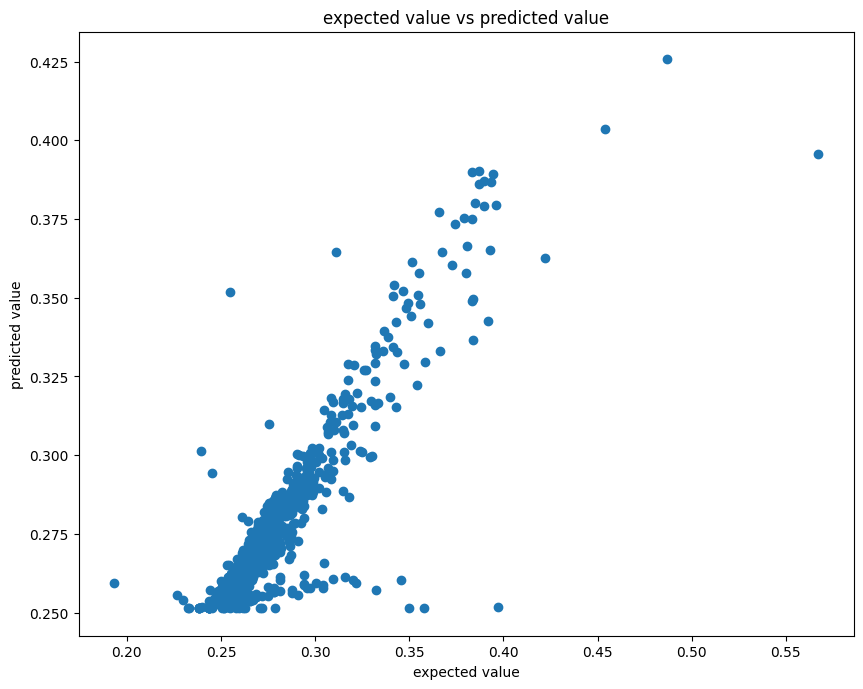

In [ ]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(expected_y, predicted_y)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('expected value vs predicted value')
plt.xlabel('expected value')
plt.ylabel('predicted value')
plt.show()